In [1]:
import cmsisdsp as cmsis

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from scipy.fft import rfft, rfftfreq

from filt_plot_funcs import *

In [2]:
fs = 200

In [3]:
SCALE_FACTOR = 4

In [4]:
def normalize(xn):
    return (xn - np.min(xn)) / (np.max(xn) - np.min(xn))

def standardize(xn):
    return ( xn - np.mean(xn) ) / np.std(xn)

## Filters

### Low Pass Filter

In [5]:
b_low, a_low = signal.iirfilter(N=2, Wn=40, btype='lowpass', rs=3, ftype='cheby2', output='ba', fs=fs)


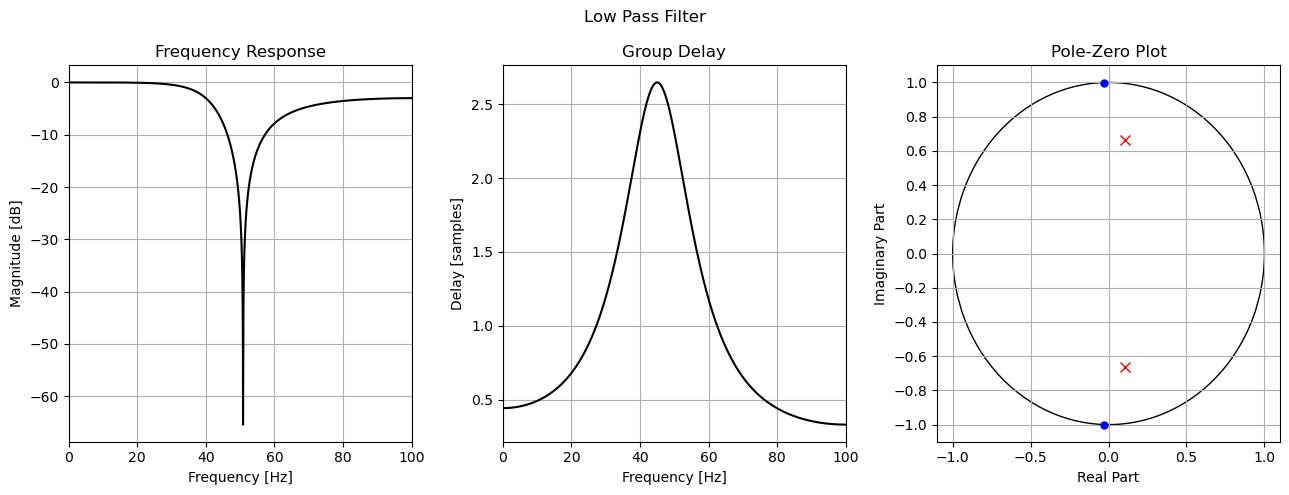

In [6]:
fig_low, axs_low = plt.subplots(1, 3, tight_layout=True, figsize=[13, 5])
plot_freq_domain(b_low, a_low, fs=fs, in_dB=True, ax1=axs_low[0], ax2=axs_low[1], filt_name='Low Pass Filter')
plot_pole_zero(b_low, a_low, ax=axs_low[2])


In [7]:
b_low_q31 = cmsis.arm_float_to_q31(b_low / SCALE_FACTOR)
a_low_q31 = cmsis.arm_float_to_q31(a_low / SCALE_FACTOR)

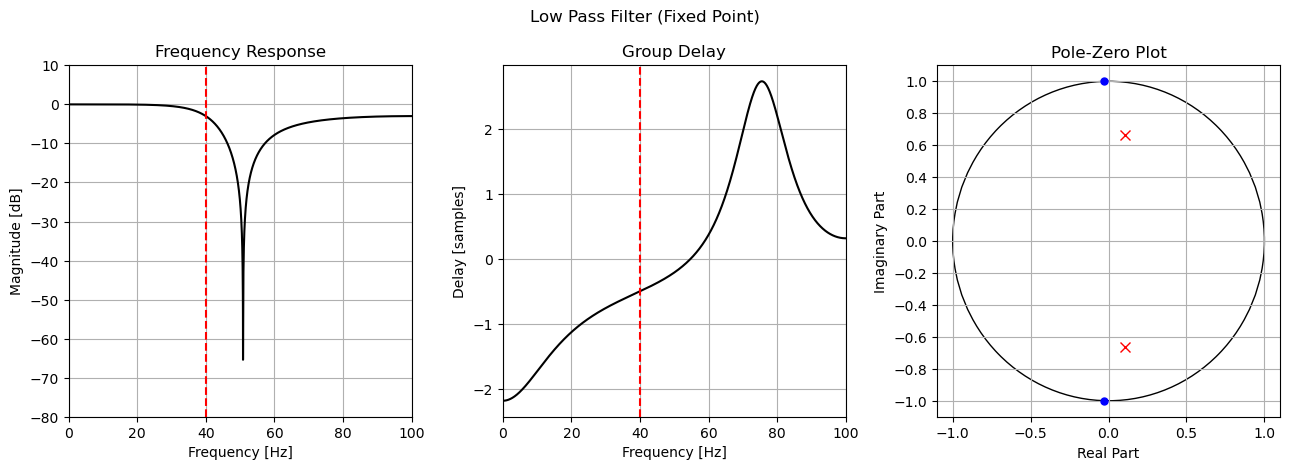

In [8]:
fig_low_q31, axs_low_q31 = plt.subplots(1, 3, tight_layout=True, figsize=[13, 4.75])
plot_freq_domain(b_low_q31, a_low_q31, fs=fs, in_dB=True, ax1=axs_low_q31[0], ax2=axs_low_q31[1], filt_name='Low Pass Filter (Fixed Point)')
plot_pole_zero(b_low_q31, a_low_q31, ax=axs_low_q31[2])

axs_low_q31[0].set_ylim([-80, 10])

for ax in axs_low_q31:
    plt.sca(ax)
    plt.axvline(40, linestyle='--', color='r')


### High Pass Filter

In [9]:
b_high, a_high = signal.iirfilter(N=2, Wn=0.5, btype='highpass', rs=10, ftype='cheby2', output='ba', fs=fs)


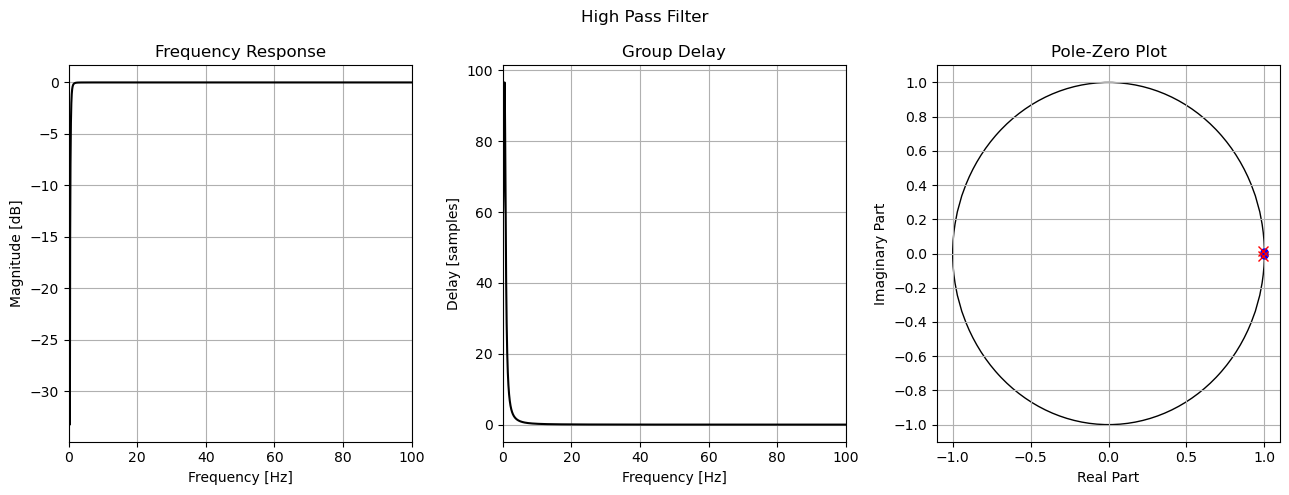

In [10]:
fig_high, axs_high = plt.subplots(1, 3, tight_layout=True, figsize=[13, 5])
plot_freq_domain(b_high, a_high, fs=fs, in_dB=True, ax1=axs_high[0], ax2=axs_high[1], filt_name='High Pass Filter')
plot_pole_zero(b_high, a_high, ax=axs_high[2])


In [11]:
b_high_q31 = cmsis.arm_float_to_q31(b_high / SCALE_FACTOR)
a_high_q31 = cmsis.arm_float_to_q31(a_high / SCALE_FACTOR)


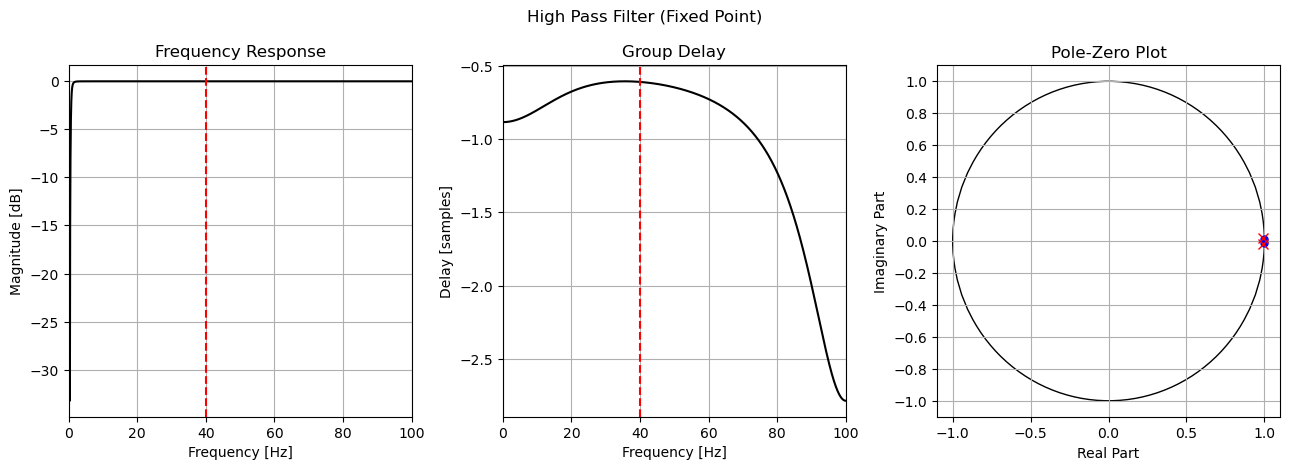

In [12]:
fig_high_q31, axs_high_q31 = plt.subplots(1, 3, tight_layout=True, figsize=[13, 4.75])
plot_freq_domain(b_high_q31, a_high_q31, fs=fs, in_dB=True, ax1=axs_high_q31[0], ax2=axs_high_q31[1], filt_name='High Pass Filter (Fixed Point)')
plot_pole_zero(b_high_q31, a_high_q31, ax=axs_high_q31[2])

for ax in axs_high_q31[:-1]:
    plt.sca(ax)
    plt.axvline(40, linestyle='--', color='r')


In [13]:
print(max(np.abs(b_high)))
print(max(np.abs(a_high)))

print(max(np.abs(b_low)))
print(max(np.abs(b_high)))


1.9769135818789034
1.976781731868328
0.6043470417453654
1.9769135818789034


### Notch Filter

In [14]:
b_notch, a_notch = signal.iirfilter(N=2, Wn=[59, 61], btype='bandstop', ftype='butter', output='ba', fs=fs)


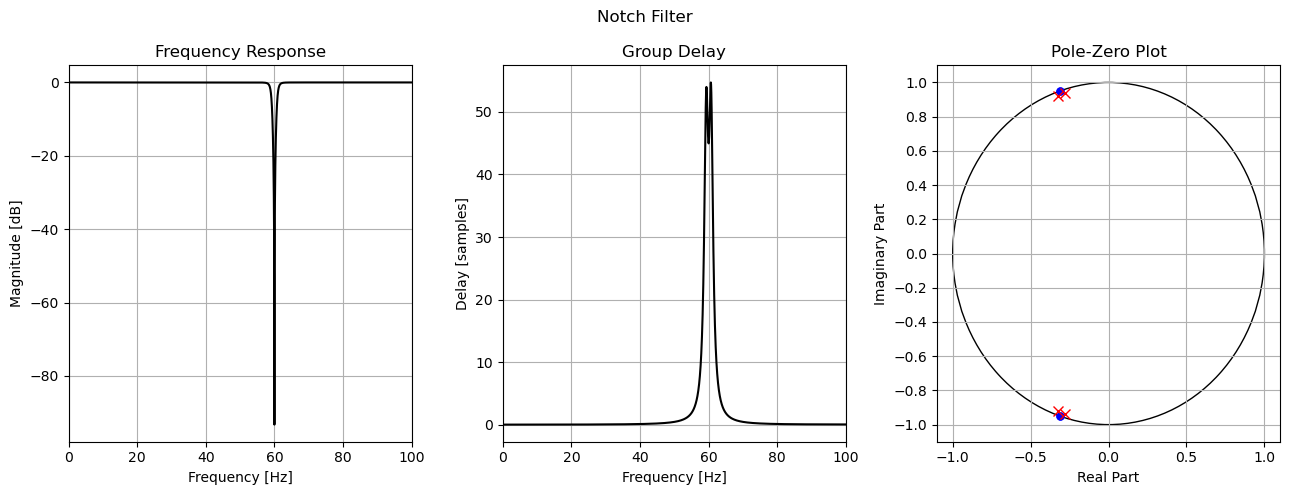

In [15]:
fig_notch, axs_notch = plt.subplots(1, 3, tight_layout=True, figsize=[13, 5])
plot_freq_domain(b_notch, a_notch, fs=fs, in_dB=True, ax1=axs_notch[0], ax2=axs_notch[1], filt_name='Notch Filter')
plot_pole_zero(b_notch, a_notch, ax=axs_notch[2])


In [16]:
b_notch_q31 = cmsis.arm_float_to_q31(b_notch / SCALE_FACTOR)
a_notch_q31 = cmsis.arm_float_to_q31(a_notch / SCALE_FACTOR)


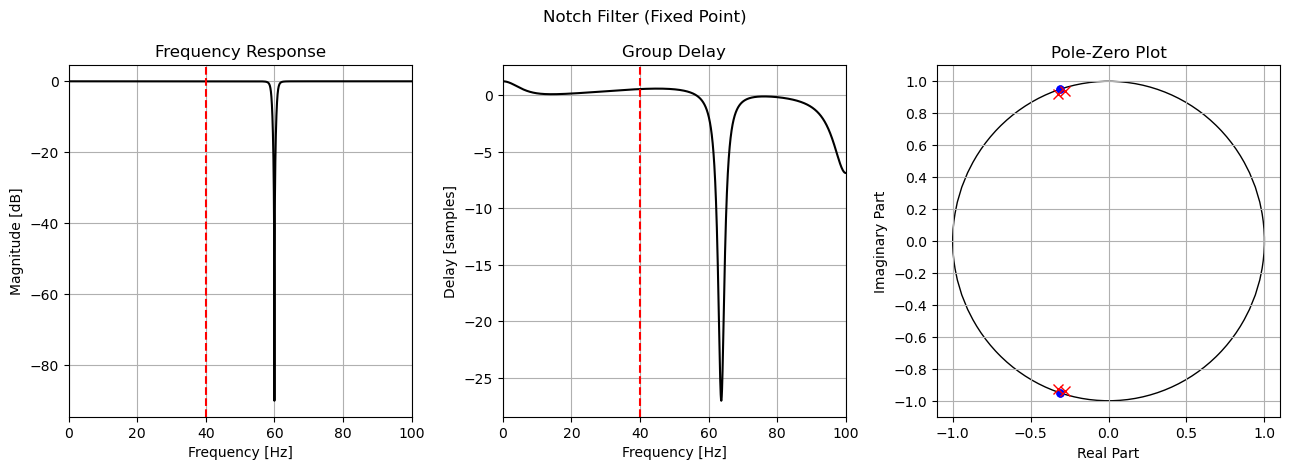

In [17]:
fig_notch_q31, axs_notch_q31 = plt.subplots(1, 3, tight_layout=True, figsize=[13, 4.75])
plot_freq_domain(b_notch_q31, a_notch_q31, fs=fs, in_dB=True, ax1=axs_notch_q31[0], ax2=axs_notch_q31[1], filt_name='Notch Filter (Fixed Point)')
plot_pole_zero(b_notch_q31, a_notch_q31, ax=axs_notch_q31[2])

for ax in axs_notch_q31[:-1]:
    plt.sca(ax)
    plt.axvline(40, linestyle='--', color='r')


In [18]:
print(max(np.abs(b_high)))
print(max(np.abs(a_high)))

print(max(np.abs(b_low)))
print(max(np.abs(a_low)))

print(max(np.abs(b_notch)))
print(max(np.abs(a_notch)))


1.9769135818789034
1.976781731868328
0.6043470417453654
1.0
2.278814291743475
2.276924908055795


## Tests

### ECG Data

In [19]:
N = 2000
n = np.arange(N)

xn_raw_f32 = pd.read_csv("../data/csv/101.csv").iloc[:N, 1].to_numpy()
xn_raw_f32 = 3.3 * normalize(xn_raw_f32)
xn_raw_f32 -= np.mean(xn_raw_f32)

Xf = np.abs( rfft(xn_raw_f32, N) )
f = rfftfreq(len(xn_raw_f32), d=1/fs)


In [20]:
xn_raw_q31 = cmsis.arm_float_to_q31(xn_raw_f32 / SCALE_FACTOR)

Xf_q31 = np.abs( rfft(xn_raw_q31, N) )


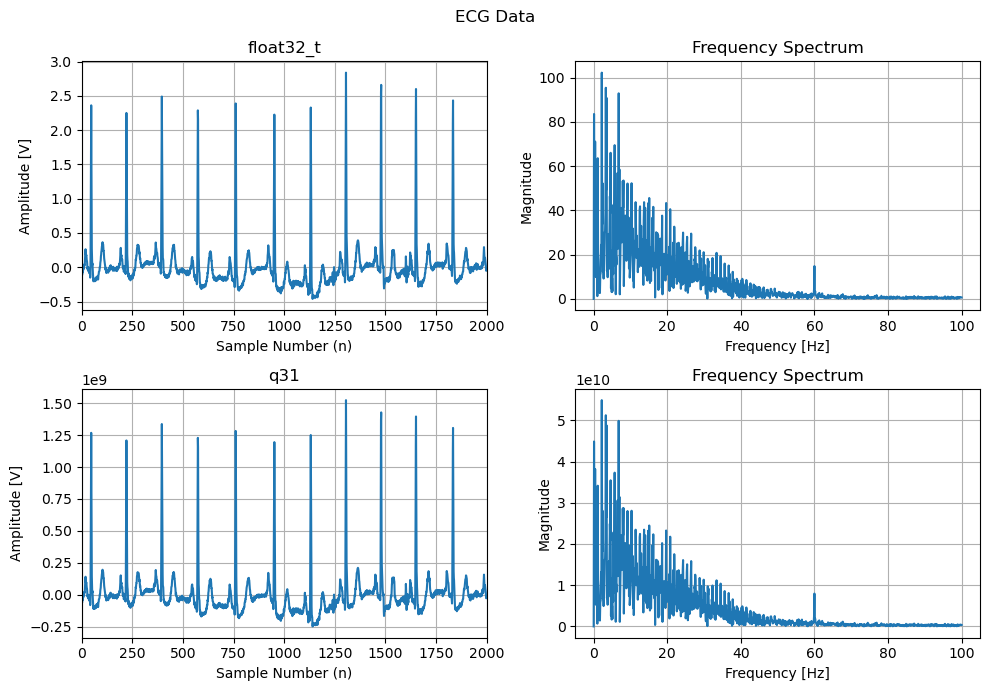

In [21]:
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=[10, 7])
fig.suptitle("ECG Data")

for idx, row in enumerate(axs):
    plt.sca(row[0])
    plt.xlim([0, N])
    plt.xlabel("Sample Number (n)")
    plt.ylabel("Amplitude [V]")
    plt.title("float32_t" if (idx == 0) else "q31")
    
    plt.sca(row[1])
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum")

for row in axs:
    for col in row:
        plt.sca(col)
        plt.grid(True)

################################################################################
# float32
################################################################################
plt.sca(axs[0][0])
plt.plot(n, xn_raw_f32)

plt.sca(axs[0][1])
plt.plot(f, Xf)

################################################################################
# q31
################################################################################
plt.sca(axs[1][0])
plt.plot(n, xn_raw_q31)

plt.sca(axs[1][1])
plt.plot(f, Xf_q31)


### Low Pass Filter

In [ ]:
sos_lpf_f32 = signal.tf2sos(b_low, a_low)
sos_lpf_f32[:, 4:] *= -1
sos_lpf_f32 = np.delete(sos_lpf_f32, 3, 1).flatten()

stateBuffer_lpf_f32 = np.zeros(4)

lpf_f32 = cmsis.arm_biquad_casd_df1_inst_f32()
status = cmsis.arm_biquad_cascade_df1_init_f32(lpf_f32, 1, sos_lpf_f32, stateBuffer_lpf_f32)
print(status)

xn_lpf_f32 = cmsis.arm_biquad_cascade_df1_f32(lpf_f32, xn_raw_f32)
Xf = np.abs( rfft(xn_lpf_f32, N) )


None


In [ ]:
sos_lpf_q31 = cmsis.arm_float_to_q31(sos_lpf_f32 / SCALE_FACTOR)

stateBuffer_lpf_q31 = np.zeros(4)

lpf_q31 = cmsis.arm_biquad_casd_df1_inst_q31()
status = cmsis.arm_biquad_cascade_df1_init_q31(lpf_q31, 1, sos_lpf_q31, stateBuffer_lpf_q31, 2)
print(status)

xn_lpf_q31 = cmsis.arm_biquad_cascade_df1_q31(lpf_q31, xn_raw_q31)
xn_lpf_q31 = cmsis.arm_q31_to_float(xn_lpf_q31) * SCALE_FACTOR
Xf_q31 = np.abs( rfft(xn_lpf_q31, N) )


None


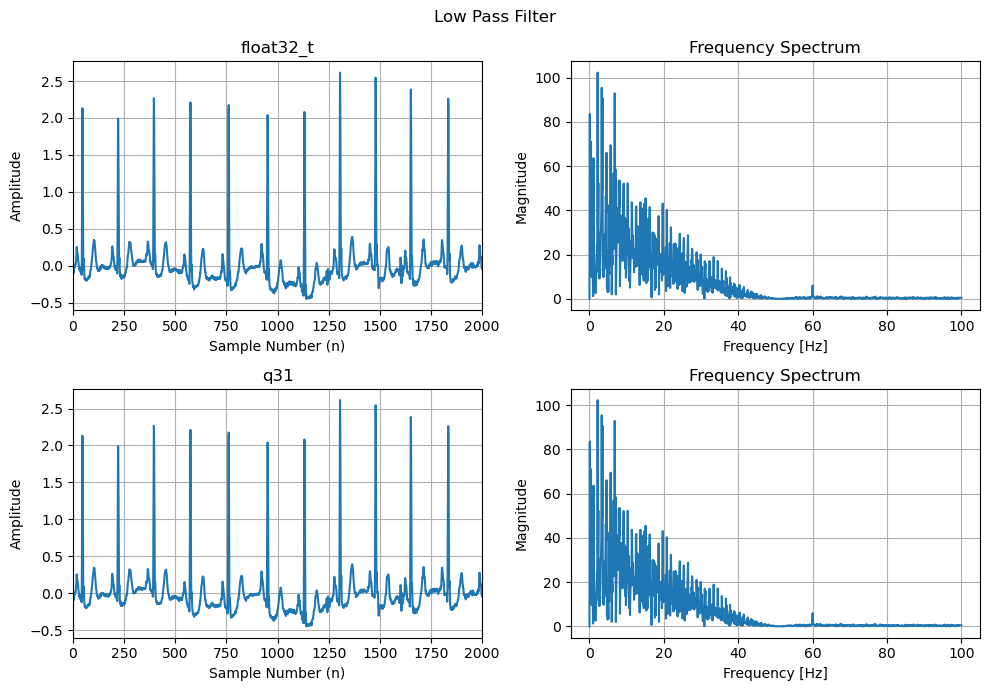

In [25]:
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=[10, 7])
fig.suptitle("Low Pass Filter")

for idx, row in enumerate(axs):
    plt.sca(row[0])
    plt.xlim([0, N])
    plt.xlabel("Sample Number (n)")
    plt.ylabel("Amplitude")
    plt.title("float32_t" if (idx == 0) else "q31")
    
    plt.sca(row[1])
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum")

for row in axs:
    for col in row:
        plt.sca(col)
        plt.grid(True)

################################################################################
# float32
################################################################################
plt.sca(axs[0][0])
plt.plot(n, xn_lpf_f32)

plt.sca(axs[0][1])
plt.plot(f, Xf)

################################################################################
# q31
################################################################################
plt.sca(axs[1][0])
plt.plot(n, xn_lpf_q31)

plt.sca(axs[1][1])
plt.plot(f, Xf_q31)


### High Pass Filter

In [26]:
sos_hpf_f32 = signal.tf2sos(b_high, a_high)
sos_hpf_f32[:, 4:] *= -1
sos_hpf_f32 = np.delete(sos_hpf_f32, 3, 1).flatten()

stateBuffer_hpf_f32 = np.zeros(4)

hpf_f32 = cmsis.arm_biquad_casd_df1_inst_f32()
status = cmsis.arm_biquad_cascade_df1_init_f32(hpf_f32, 1, sos_hpf_f32, stateBuffer_hpf_f32)
print(status)

xn_hpf_f32 = cmsis.arm_biquad_cascade_df1_f32(hpf_f32, xn_raw_f32)
Xf = np.abs( rfft(xn_hpf_f32, N) )


None


In [27]:
sos_hpf_q31 = cmsis.arm_float_to_q31(sos_hpf_f32 / SCALE_FACTOR)

stateBuffer_hpf_q31 = np.zeros(4)

hpf_q31 = cmsis.arm_biquad_casd_df1_inst_q31()
status = cmsis.arm_biquad_cascade_df1_init_q31(hpf_q31, 1, sos_hpf_q31, stateBuffer_hpf_q31, 2)
print(status)

xn_hpf_q31 = cmsis.arm_biquad_cascade_df1_q31(hpf_q31, xn_raw_q31)
xn_hpf_q31 = cmsis.arm_q31_to_float(xn_hpf_q31) * SCALE_FACTOR
Xf_q31 = np.abs( rfft(xn_hpf_q31, N) )


None


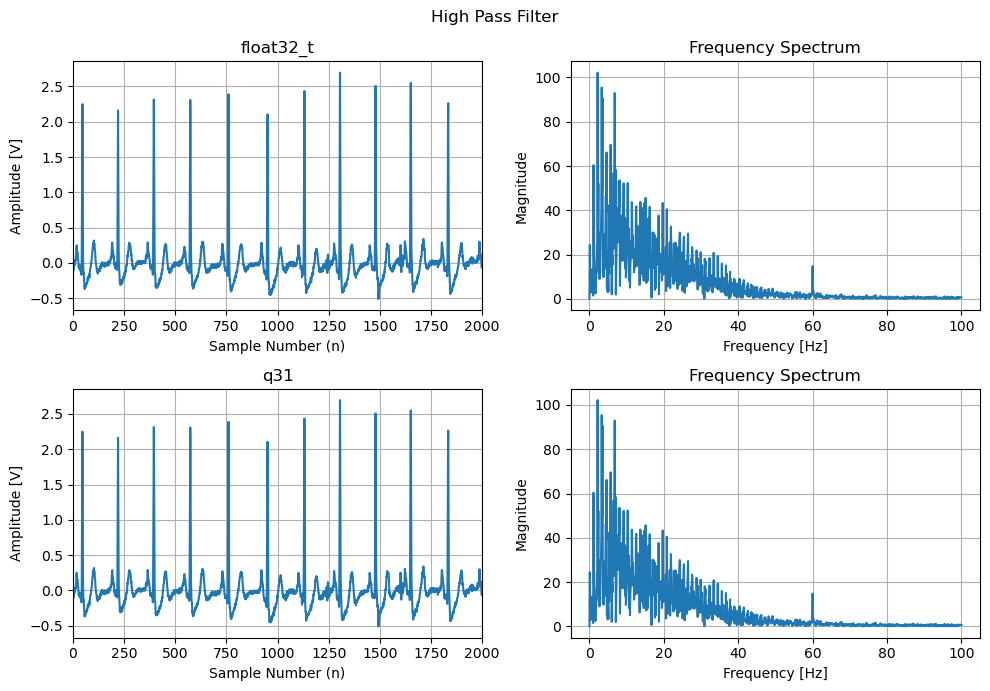

In [29]:
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=[10, 7])
fig.suptitle("High Pass Filter")

for idx, row in enumerate(axs):
    plt.sca(row[0])
    plt.xlim([0, N])
    plt.xlabel("Sample Number (n)")
    plt.ylabel("Amplitude [V]")
    plt.title("float32_t" if (idx == 0) else "q31")
    
    plt.sca(row[1])
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum")

for row in axs:
    for col in row:
        plt.sca(col)
        plt.grid(True)

################################################################################
# float32
################################################################################
plt.sca(axs[0][0])
plt.plot(n, xn_hpf_f32)

plt.sca(axs[0][1])
plt.plot(f, Xf)

################################################################################
# q31
################################################################################
plt.sca(axs[1][0])
plt.plot(n, xn_hpf_q31)

plt.sca(axs[1][1])
plt.plot(f, Xf_q31)


### Notch Filter

In [30]:
sos_notch_f32 = signal.tf2sos(b_notch, a_notch)
sos_notch_f32[:, 4:] *= -1
sos_notch_f32 = np.delete(sos_notch_f32, 3, 1).flatten()

stateBuffer_notch_f32 = np.zeros(4)

notch_f32 = cmsis.arm_biquad_casd_df1_inst_f32()
status = cmsis.arm_biquad_cascade_df1_init_f32(notch_f32, 1, sos_notch_f32, stateBuffer_notch_f32)
print(status)

xn_notch_f32 = cmsis.arm_biquad_cascade_df1_f32(notch_f32, xn_raw_f32)
Xf = np.abs( rfft(xn_notch_f32, N) )


None


In [31]:
sos_notch_q31 = cmsis.arm_float_to_q31(sos_notch_f32 / SCALE_FACTOR)

stateBuffer_notch_q31 = np.zeros(4)

notch_q31 = cmsis.arm_biquad_casd_df1_inst_q31()
status = cmsis.arm_biquad_cascade_df1_init_q31(notch_q31, 1, sos_notch_q31, stateBuffer_notch_q31, 2)
print(status)

xn_notch_q31 = cmsis.arm_biquad_cascade_df1_q31(notch_q31, xn_raw_q31)
xn_notch_q31 = cmsis.arm_q31_to_float(xn_notch_q31) * SCALE_FACTOR
Xf_q31 = np.abs( rfft(xn_notch_q31, N) )


None


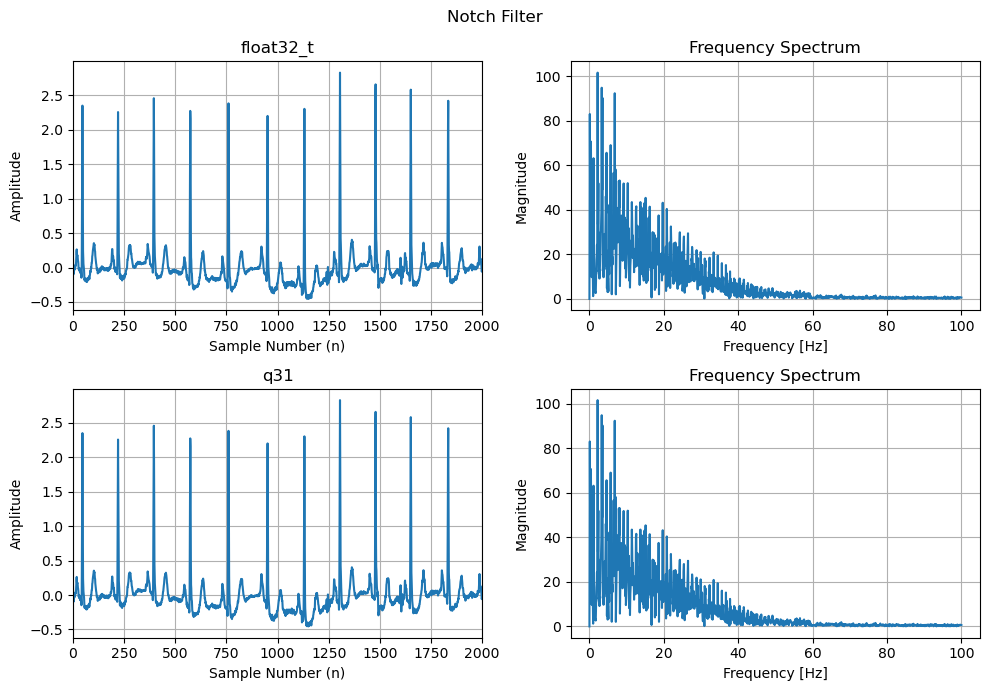

In [32]:
fig, axs = plt.subplots(2, 2, tight_layout=True, figsize=[10, 7])
fig.suptitle("Notch Filter")

for idx, row in enumerate(axs):
    plt.sca(row[0])
    plt.xlim([0, N])
    plt.xlabel("Sample Number (n)")
    plt.ylabel("Amplitude")
    plt.title("float32_t" if (idx == 0) else "q31")
    
    plt.sca(row[1])
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum")

for row in axs:
    for col in row:
        plt.sca(col)
        plt.grid(True)

################################################################################
# float32
################################################################################
plt.sca(axs[0][0])
plt.plot(n, xn_notch_f32)

plt.sca(axs[0][1])
plt.plot(f, Xf)

################################################################################
# q31
################################################################################
plt.sca(axs[1][0])
plt.plot(n, xn_notch_q31)

plt.sca(axs[1][1])
plt.plot(f, Xf_q31)
